<a href="https://colab.research.google.com/github/yoe174/PCVK_27_3C/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modul 8 - Morfologi**

## Langkah 1

Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.

Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Langkah 2

Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Langkah 3

Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)

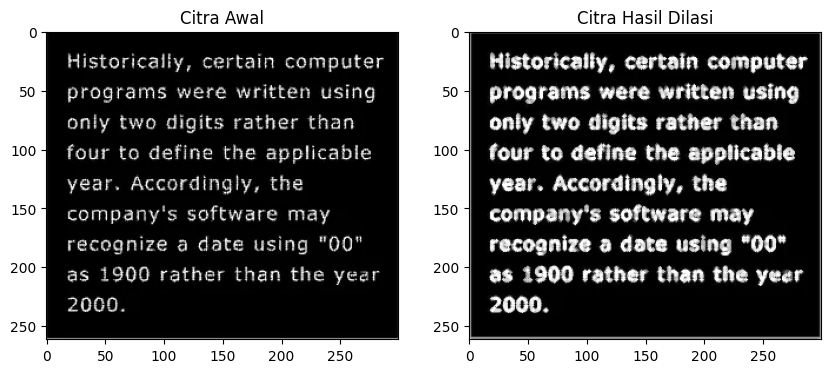

In [3]:
Image1 = '/content/drive/MyDrive/PCVK/morphology.png'

MorphImg = cv2.imread(Image1)

kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

dilated = cv2.dilate(MorphImg, kernel, iterations=1)

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title('Citra Awal')
plt.imshow(MorphImg)

plt.subplot(122)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilated)

## Langkah 4

Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)


[[0 1 0]
 [1 1 1]
 [0 1 0]]


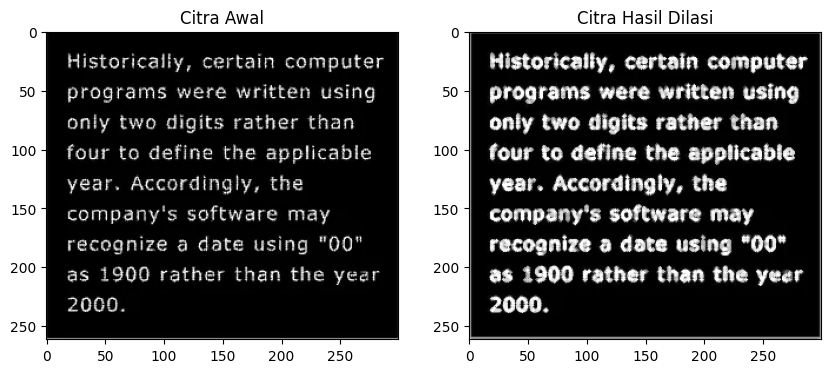

In [4]:
Image2 = MorphImg.copy()

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

dilated = cv2.dilate(Image2, kernel, iterations=1)

plt.figure(figsize=(10, 5))

print(kernel)

plt.subplot(121)
plt.title('Citra Awal')
plt.imshow(Image2)

plt.subplot(122)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilated)

## Langkah 5

Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

(-0.5, 111.5, 149.5, -0.5)

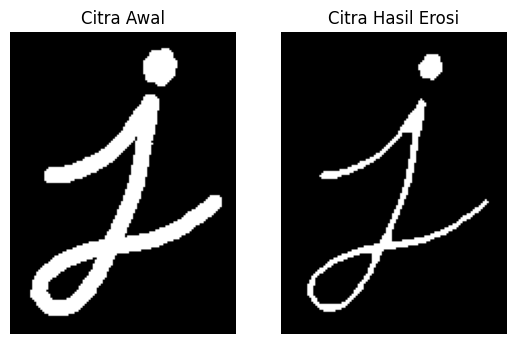

In [6]:
!pip install opencv-python

import cv2
import numpy as np
import matplotlib.pyplot as plt

Image3 = '/content/drive/MyDrive/PCVK/j.png'

JImg = cv2.imread(Image3)

_, binary_image = cv2.threshold(JImg, 127, 255, cv2.THRESH_BINARY)

def erode(image, kernel_size=5):
    kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)
    eroded_image = np.zeros_like(image)

    # Change here to handle 2D and 3D images
    if len(image.shape) == 2:  # If image is grayscale (2D)
        pad_width = ((kernel_size // 2, kernel_size // 2), (kernel_size // 2, kernel_size // 2))
    else:  # If image is color (3D)
        pad_width = ((kernel_size // 2, kernel_size // 2), (kernel_size // 2, kernel_size // 2), (0, 0))

    padded_image = np.pad(image, pad_width, mode='constant', constant_values=0)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            if np.all(region == 255):
                eroded_image[i, j] = 255
            else:
                eroded_image[i, j] = 0

    return eroded_image

eroded_image = erode(binary_image)

plt.subplot(121)
plt.title('Citra Awal')
plt.imshow(JImg)
plt.axis('off')

plt.subplot(122)
plt.title('Citra Hasil Erosi')
plt.imshow(eroded_image)
plt.axis('off')

## Langkah 6

Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

(-0.5, 111.5, 149.5, -0.5)

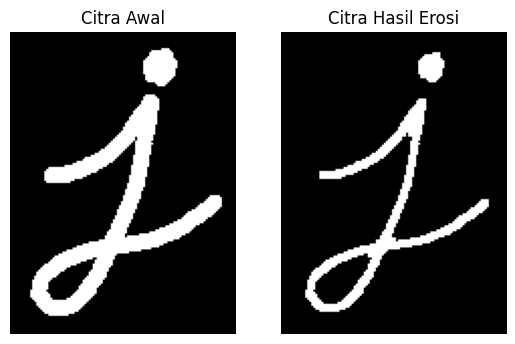

In [7]:
Image4 = JImg.copy()

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

eroded_image = cv2.erode(Image4, kernel, iterations=1)

plt.subplot(121)
plt.title('Citra Awal')
plt.imshow(Image4)
plt.axis('off')

plt.subplot(122)
plt.title('Citra Hasil Erosi')
plt.imshow(eroded_image)
plt.axis('off')

## Langkah 7

Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

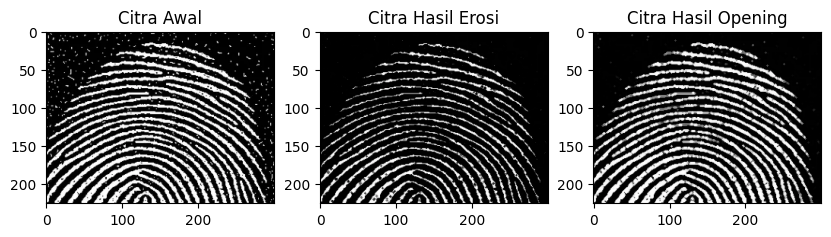

In [8]:
Image5 = '/content/drive/MyDrive/PCVK/fingerprint.png'

FImg = cv2.imread(Image5)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

eroded_image = cv2.erode(FImg, kernel, iterations=1)

opened_image = cv2.dilate(eroded_image, kernel, iterations=1)

plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.title('Citra Awal')
plt.imshow(FImg)

plt.subplot(132)
plt.title('Citra Hasil Erosi')
plt.imshow(eroded_image)

plt.subplot(133)
plt.title('Citra Hasil Opening')
plt.imshow(opened_image)

## Langkah 8

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)


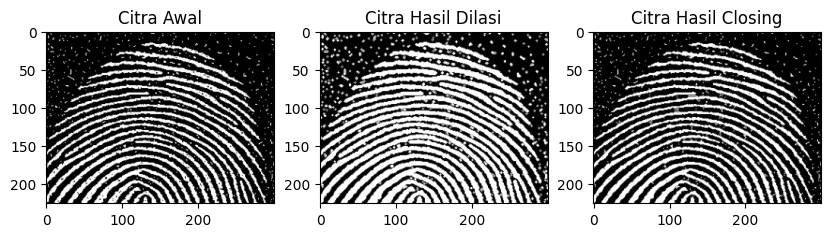

In [9]:
Image6 = FImg.copy()

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

dilated_image = cv2.dilate(Image6, kernel, iterations=1)

closed_image = cv2.erode(dilated_image, kernel, iterations=1)

plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.title('Citra Awal')
plt.imshow(Image6)

plt.subplot(132)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilated_image)

plt.subplot(133)
plt.title('Citra Hasil Closing')
plt.imshow(closed_image)

## Langkah 9


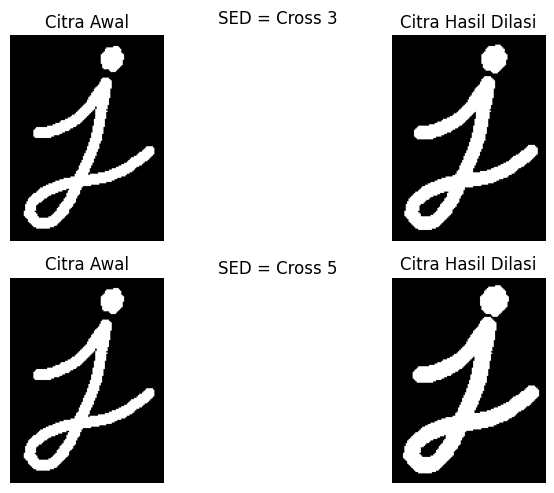

In [10]:
Image7 = JImg.copy()

kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

kernel5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

dilated3 = cv2.dilate(Image7, kernel3, iterations=1)

dilated5 = cv2.dilate(Image7, kernel5, iterations=1)

fig, axs = plt.subplots(2, 2, figsize=(10, 5))

plt.subplot(221)
plt.title('Citra Awal')
plt.imshow(Image7)
plt.axis('off')

plt.subplot(222)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilated3)
plt.axis('off')

fig.text(0.5, 0.95, 'SED = Cross 3', ha='center', fontsize=12)

plt.subplot(223)
plt.title('Citra Awal')
plt.imshow(Image7)
plt.axis('off')

plt.subplot(224)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilated5)
plt.axis('off')

fig.text(0.5, 0.45, 'SED = Cross 5', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

## Langkah 10

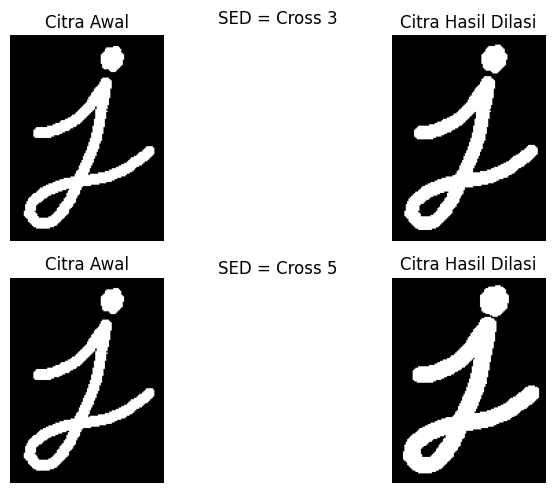

In [11]:
Image8 = JImg.copy()

kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

kernel5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

dilated3 = cv2.dilate(Image8, kernel3, iterations=1)

dilated5 = cv2.dilate(Image8, kernel5, iterations=1)

fig, axs = plt.subplots(2, 2, figsize=(10, 5))

plt.subplot(221)
plt.title('Citra Awal')
plt.imshow(Image8)
plt.axis('off')

plt.subplot(222)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilated3)
plt.axis('off')

fig.text(0.5, 0.95, 'SED = Cross 3', ha='center', fontsize=12)

plt.subplot(223)
plt.title('Citra Awal')
plt.imshow(Image8)
plt.axis('off')

plt.subplot(224)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilated5)
plt.axis('off')

fig.text(0.5, 0.45, 'SED = Cross 5', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

## Langkah 11

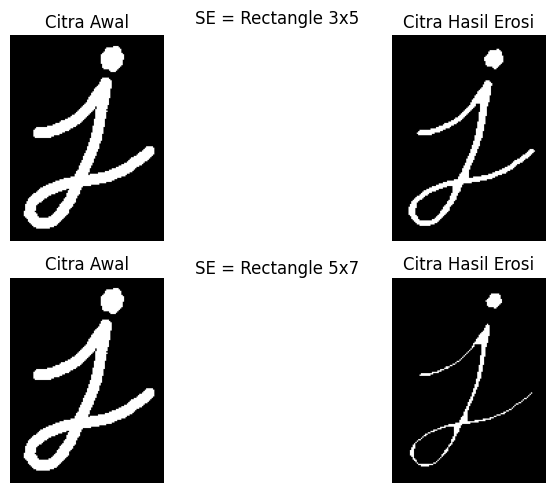

In [12]:
Image9 = JImg.copy()

kernel35 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))

kernel57 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))

eroded35 = cv2.erode(Image9, kernel35, iterations=1)

eroded57 = cv2.erode(Image9, kernel57, iterations=1)

fig, axs = plt.subplots(2, 2, figsize=(10, 5))

plt.subplot(221)
plt.title('Citra Awal')
plt.imshow(Image9)
plt.axis('off')

plt.subplot(222)
plt.title('Citra Hasil Erosi')
plt.imshow(eroded35)
plt.axis('off')

fig.text(0.5, 0.95, 'SE = Rectangle 3x5', ha='center', fontsize=12)

plt.subplot(223)
plt.title('Citra Awal')
plt.imshow(Image9)
plt.axis('off')

plt.subplot(224)
plt.title('Citra Hasil Erosi')
plt.imshow(eroded57)
plt.axis('off')

fig.text(0.5, 0.45, 'SE = Rectangle 5x7', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

## Langkah 12

 Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

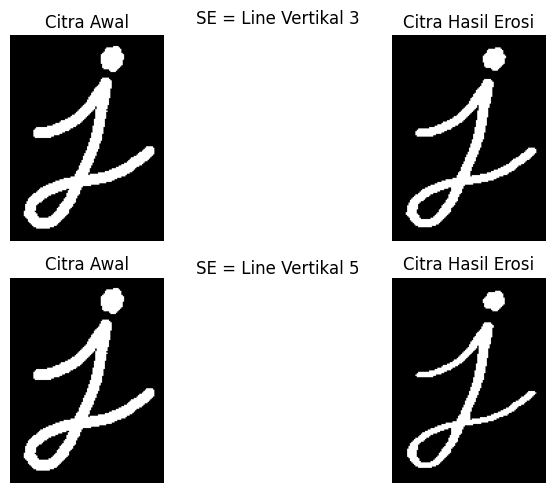

In [13]:
Image10 = JImg.copy()

kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))

kernel5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))

eroded3 = cv2.erode(Image10, kernel3, iterations=1)

eroded5 = cv2.erode(Image10, kernel5, iterations=1)

fig, axs = plt.subplots(2, 2, figsize=(10, 5))

plt.subplot(221)
plt.title('Citra Awal')
plt.imshow(Image10)
plt.axis('off')

plt.subplot(222)
plt.title('Citra Hasil Erosi')
plt.imshow(eroded3)
plt.axis('off')

fig.text(0.5, 0.95, 'SE = Line Vertikal 3', ha='center', fontsize=12)

plt.subplot(223)
plt.title('Citra Awal')
plt.imshow(Image10)
plt.axis('off')

plt.subplot(224)
plt.title('Citra Hasil Erosi')
plt.imshow(eroded5)
plt.axis('off')

fig.text(0.5, 0.45, 'SE = Line Vertikal 5', ha='center', fontsize=12)

plt.tight_layout()
plt.show()